# Capacity Test

In [6]:
# Data Analysis
import pandas as pd

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Utilities
import numpy as np
# from tqdm import tnrange
import pickle
import os
from tqdm import tqdm_notebook as tqdmn
# import warnings

In [7]:
%config InlineBackend.figure_format = 'retina'

## Small resources

In [8]:
nominal_rates_min = np.arange(10, 130, 10)
rep = 5
duration = 60

description = {}

throughput = []
response_time = []
request_rate = []

for rate_min in nominal_rates_min:
    
    print()
    
    request_rate_avg = []    
    response_time_avg = []
    throughput_avg = []
    
    for i in np.arange(1, rep+1):

        df = pd.read_csv('dataset/small/' + str(rate_min) + 'k_0' + str(i) + '.jtl')
        
        descr_name = str(rate_min) + 'k_0' + str(i)
        description[descr_name] = df.elapsed.describe()

        tot_req = df.shape[0]
        print('Total requests:', tot_req)

        nominal_rate = rate_min*1000/duration 
        print('Nominal request rate:', nominal_rate)

    #     duration = (df.timeStamp[df.shape[0]-1]-df.timeStamp[0])/1000
        actual_rate = tot_req/duration
        print('Actual request rate:', actual_rate)

        err = (df['success'] == False).sum()
        print('Errors:', err, '(' + str(err/tot_req*100) + ' %)')
        
#         elaps = df.loc[df['success']==True, 'elapsed'].median()
        elaps = df.loc[df['success']==True, 'elapsed'].mean()
        print('Avg elapsed time:', elaps)

        tp = (tot_req-err)/60       
        print('Throughput:', tp)

        print()
        
        request_rate_avg.append(actual_rate)
        response_time_avg.append(elaps)
        throughput_avg.append(tp)
    
    print('------------------------------------------')
    print()
        
    request_rate.append(nominal_rate)
#     request_rate.append(np.mean(request_rate_avg))
    response_time.append(np.mean(response_time_avg))
    throughput.append(np.mean(throughput_avg))
    
power = [throughput[i]/response_time[i] for i in range(len(throughput))]


Total requests: 10067
Nominal request rate: 166.66666666666666
Actual request rate: 167.78333333333333
Errors: 0 (0.0 %)
Avg elapsed time: 2.656998112645277
Throughput: 167.78333333333333

Total requests: 10055
Nominal request rate: 166.66666666666666
Actual request rate: 167.58333333333334
Errors: 0 (0.0 %)
Avg elapsed time: 2.554549975136748
Throughput: 167.58333333333334

Total requests: 10024
Nominal request rate: 166.66666666666666
Actual request rate: 167.06666666666666
Errors: 0 (0.0 %)
Avg elapsed time: 3.548683160415004
Throughput: 167.06666666666666

Total requests: 10033
Nominal request rate: 166.66666666666666
Actual request rate: 167.21666666666667
Errors: 0 (0.0 %)
Avg elapsed time: 2.510913983853284
Throughput: 167.21666666666667

Total requests: 10080
Nominal request rate: 166.66666666666666
Actual request rate: 168.0
Errors: 0 (0.0 %)
Avg elapsed time: 2.6287698412698415
Throughput: 168.0

------------------------------------------


Total requests: 20010
Nominal requ

C:\Users\fabio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total requests: 39963
Nominal request rate: 666.6666666666666
Actual request rate: 666.05
Errors: 10 (0.025023146410429645 %)
Avg elapsed time: 3.4644457237253774
Throughput: 665.8833333333333

Total requests: 39984
Nominal request rate: 666.6666666666666
Actual request rate: 666.4
Errors: 210 (0.5252100840336135 %)
Avg elapsed time: 3.682405591592498
Throughput: 662.9



C:\Users\fabio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total requests: 39990
Nominal request rate: 666.6666666666666
Actual request rate: 666.5
Errors: 97 (0.24256064016004 %)
Avg elapsed time: 3.777655227734189
Throughput: 664.8833333333333



C:\Users\fabio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total requests: 39889
Nominal request rate: 666.6666666666666
Actual request rate: 664.8166666666667
Errors: 73 (0.18300784677480006 %)
Avg elapsed time: 4.289029535864979
Throughput: 663.6

------------------------------------------


Total requests: 49744
Nominal request rate: 833.3333333333334
Actual request rate: 829.0666666666667
Errors: 1076 (2.1630749437118046 %)
Avg elapsed time: 7.553772499383578
Throughput: 811.1333333333333

Total requests: 49836
Nominal request rate: 833.3333333333334
Actual request rate: 830.6
Errors: 583 (1.1698370655750863 %)
Avg elapsed time: 4.389133656833086
Throughput: 820.8833333333333

Total requests: 49748
Nominal request rate: 833.3333333333334
Actual request rate: 829.1333333333333
Errors: 320 (0.6432419393744472 %)
Avg elapsed time: 5.223678886461115
Throughput: 823.8

Total requests: 49869
Nominal request rate: 833.3333333333334
Actual request rate: 831.15
Errors: 293 (0.5875393531051354 %)
Avg elapsed time: 5.384641762142972
Throughput: 826.2

Errors: 8147 (8.585730846243019 %)
Avg elapsed time: 48.01883725487936
Throughput: 1445.7166666666667

------------------------------------------



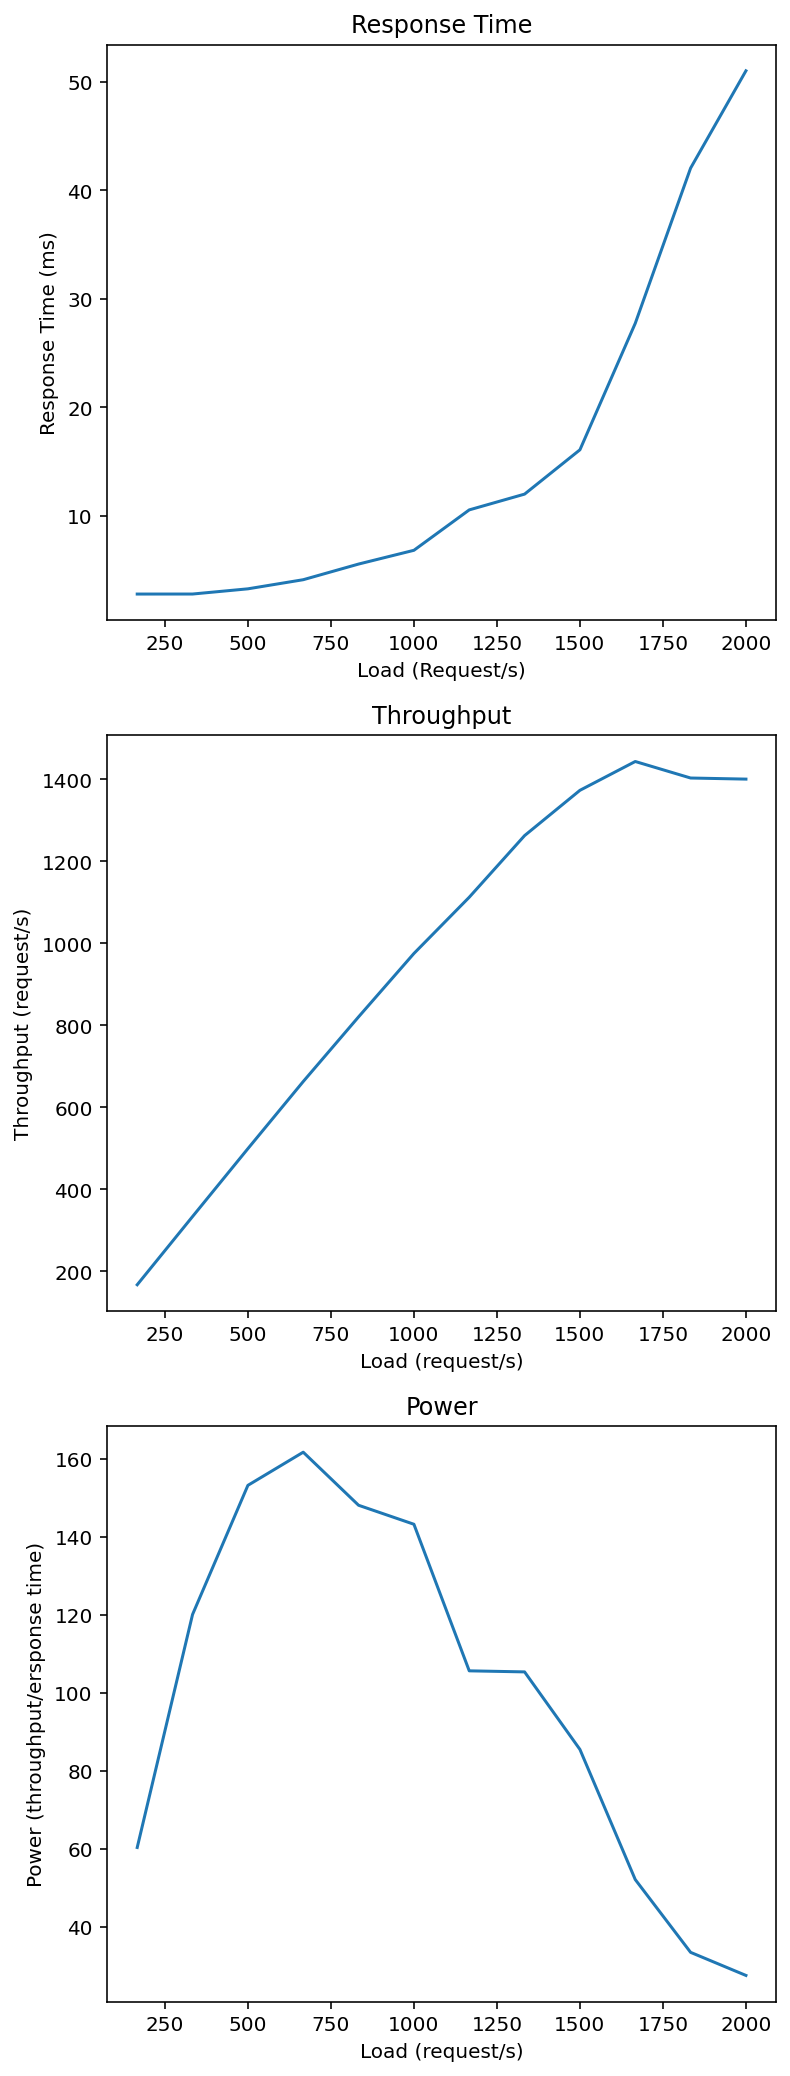

In [9]:
fig = plt.figure(figsize=(6,18))

ax0 = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)

ax0.plot(request_rate, response_time)
ax1.plot(request_rate, throughput)
ax2.plot(request_rate, power)

ax0.set_title('Response Time')
ax0.set_xlabel('Load (Request/s)')
ax0.set_ylabel('Response Time (ms)')

ax1.set_title('Throughput')
ax1.set_xlabel('Load (request/s)')
ax1.set_ylabel('Throughput (request/s)')

ax2.set_title('Power')
ax2.set_xlabel('Load (request/s)')
ax2.set_ylabel('Power (throughput/ersponse time)')

plt.show()

## Large resources

In [13]:
nominal_rates_min = np.arange(2, 22, 2)
rep = 1
duration = 60

description = {}

throughput = []
response_time = []
request_rate = []

for rate_min in nominal_rates_min:
    
    print()
    
    request_rate_avg = []    
    response_time_avg = []
    throughput_avg = []
    
    for i in np.arange(1, rep+1):

        df = pd.read_csv('dataset/large/' + str(rate_min) + 'k_0' + str(i) + '.jtl')
        
        descr_name = str(rate_min) + 'k_0' + str(i)
        description[descr_name] = df.elapsed.describe()

        tot_req = df.shape[0]
        print('Total requests:', tot_req)

        nominal_rate = rate_min*1000/duration 
        print('Nominal request rate:', nominal_rate)

    #     duration = (df.timeStamp[df.shape[0]-1]-df.timeStamp[0])/1000
        actual_rate = tot_req/duration
        print('Actual request rate:', actual_rate)

        err = (df['success'] == False).sum()
        print('Errors:', err, '(' + str(err/tot_req*100) + ' %)')
        
#         elaps = df.loc[df['success']==True, 'elapsed'].median()
        elaps = df.loc[df['success']==True, 'elapsed'].mean()
        print('Avg elapsed time:', elaps)

        tp = (tot_req-err)/60       
        print('Throughput:', tp)

        print()
        
        request_rate_avg.append(actual_rate)
        response_time_avg.append(elaps)
        throughput_avg.append(tp)
    
    print('------------------------------------------')
    print()
        
    request_rate.append(nominal_rate)
#     request_rate.append(np.mean(request_rate_avg))
    response_time.append(np.mean(response_time_avg))
    throughput.append(np.mean(throughput_avg))
    
power = [throughput[i]/response_time[i] for i in range(len(throughput))]


Total requests: 2072
Nominal request rate: 33.333333333333336
Actual request rate: 34.53333333333333
Errors: 0 (0.0 %)
Avg elapsed time: 18.71814671814672
Throughput: 34.53333333333333

------------------------------------------


Total requests: 4057
Nominal request rate: 66.66666666666667
Actual request rate: 67.61666666666666
Errors: 26 (0.6408676361843727 %)
Avg elapsed time: 18.692384023815432
Throughput: 67.18333333333334

------------------------------------------


Total requests: 6036
Nominal request rate: 100.0
Actual request rate: 100.6
Errors: 46 (0.7620941020543406 %)
Avg elapsed time: 20.812687813021704
Throughput: 99.83333333333333

------------------------------------------


Total requests: 8017
Nominal request rate: 133.33333333333334
Actual request rate: 133.61666666666667
Errors: 47 (0.5862542098041662 %)
Avg elapsed time: 21.984943538268507
Throughput: 132.83333333333334

------------------------------------------


Total requests: 9995
Nominal request rate: 166.6

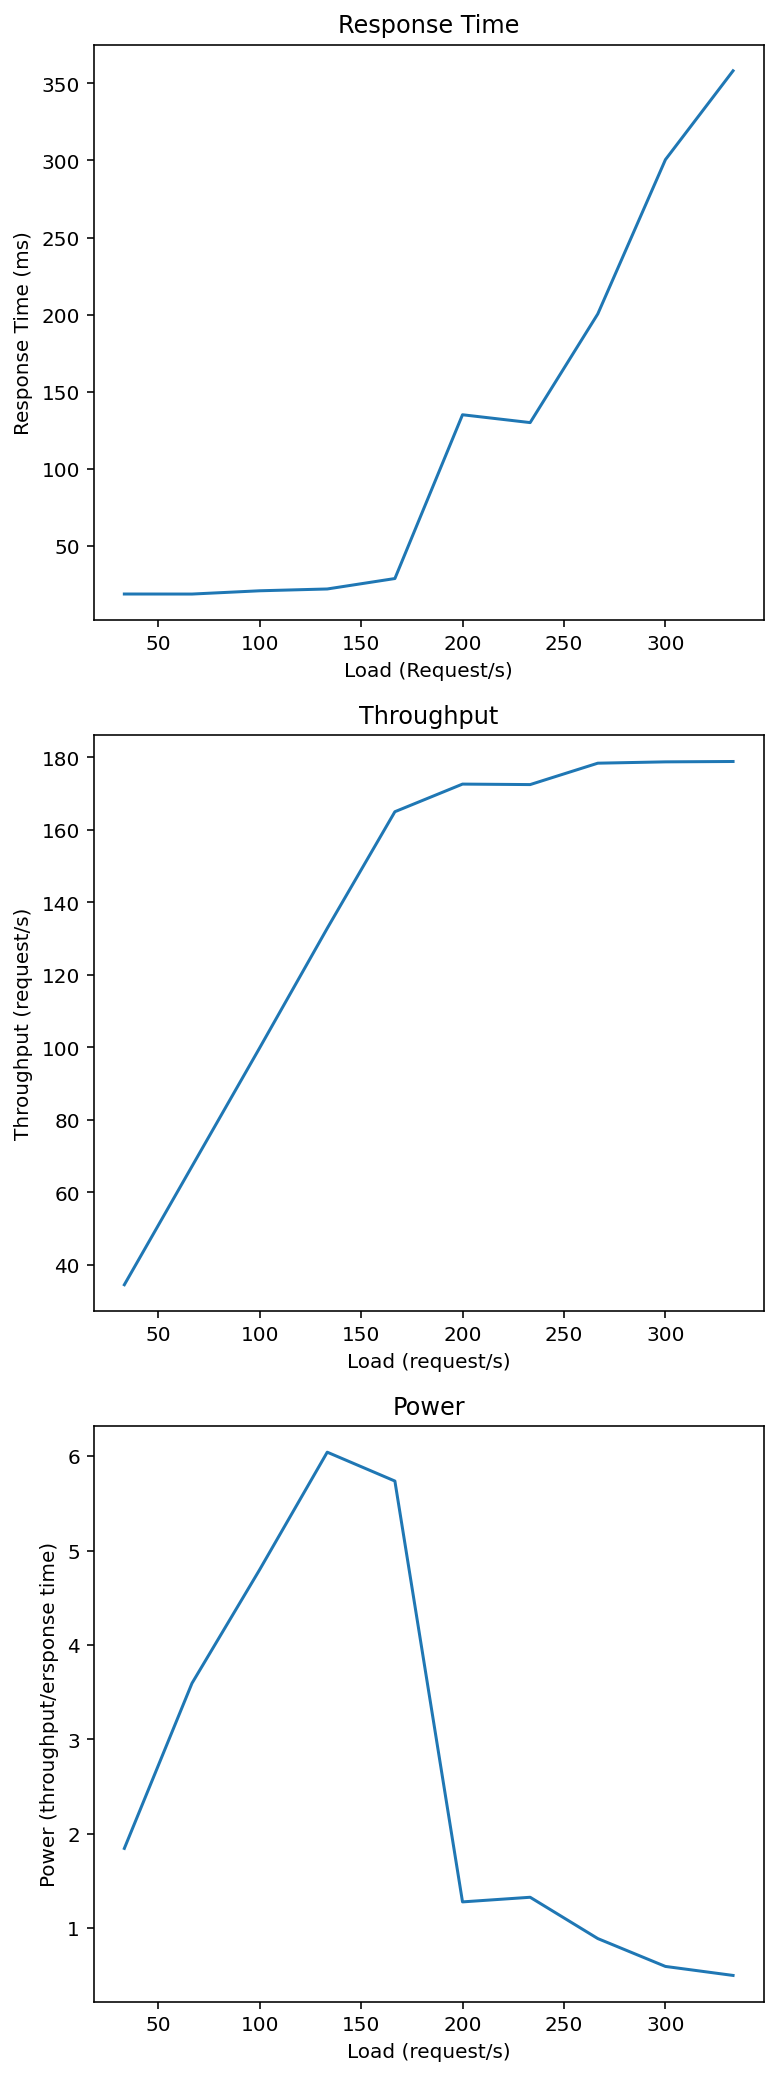

In [14]:
fig = plt.figure(figsize=(6,18))

ax0 = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)

ax0.plot(request_rate, response_time)
ax1.plot(request_rate, throughput)
ax2.plot(request_rate, power)

ax0.set_title('Response Time')
ax0.set_xlabel('Load (Request/s)')
ax0.set_ylabel('Response Time (ms)')

ax1.set_title('Throughput')
ax1.set_xlabel('Load (request/s)')
ax1.set_ylabel('Throughput (request/s)')

ax2.set_title('Power')
ax2.set_xlabel('Load (request/s)')
ax2.set_ylabel('Power (throughput/ersponse time)')

plt.show()